## 📊 Exploratory Data Analysis (EDA)

In this section, we explore and understand the structure and main patterns in the dataset.

We will go through the following steps:

1. **Dataset Overview**  
   - Shape, column types, and missing values.

2. **Univariate Analysis**  
   - Distribution of numerical columns.  
   - Count of categories for categorical columns.

3. **Bivariate Analysis**  
   - Relationship between two variables (e.g., claims vs premiums).  
   - Correlation between numeric features.

4. **Time Series Analysis**  
   - Trends over time using `TransactionMonth`.

These visualizations will help us find patterns, trends, and insights useful for modeling and decision-making.


In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import stats
import numpy as np

In [4]:
df = pd.read_csv('../data/cleaned_data.csv')  # Adjust path if needed
print(f"Dataset shape: {df.shape}")
df.head()

Dataset shape: (998902, 39)


,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Bank,AccountType,MaritalStatus,...,NewVehicle,SumInsured,CalculatedPremiumPerTerm,CoverCategory,CoverType,CoverGroup,Section,Product,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,First National Bank,Current account,Unknown,...,More than 6 months,0.01,25.0000,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,First National Bank,Current account,Unknown,...,More than 6 months,0.01,25.0000,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,First National Bank,Current account,Unknown,...,More than 6 months,0.01,25.0000,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,First National Bank,Current account,Unknown,...,More than 6 months,119300.00,584.6468,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,First National Bank,Current account,Unknown,...,More than 6 months,119300.00,584.6468,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,0.000000,0.0


## Univariate Analysis (Single Variable)

**Objective:** Understand the distribution of individual variables.

### Numeric Variables:

- Histogram and Boxplot of **TotalPremium**
- Histogram and Boxplot of **TotalClaims**
- Histogram of **SumInsured** and **CalculatedPremiumPerTerm**


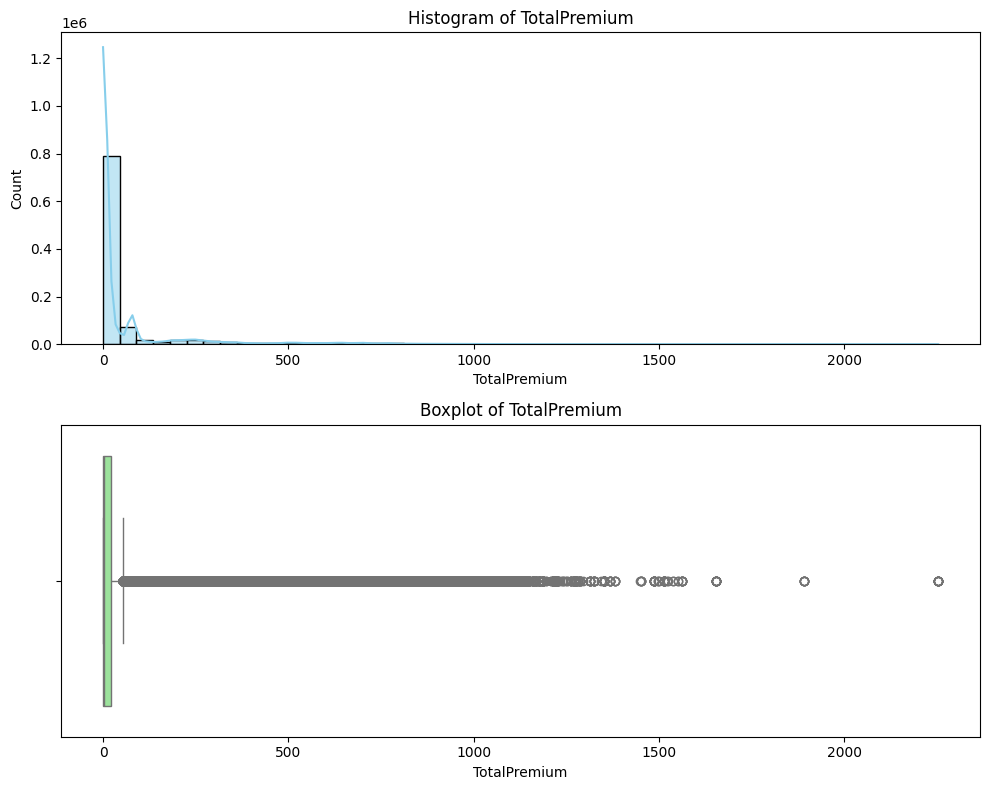

In [5]:
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

sns.histplot(df['TotalPremium'], bins=50, ax=axes[0], kde=True, color='skyblue')
axes[0].set_title('Histogram of TotalPremium')

sns.boxplot(x=df['TotalPremium'], ax=axes[1], color='lightgreen')
axes[1].set_title('Boxplot of TotalPremium')

plt.tight_layout()
plt.show()


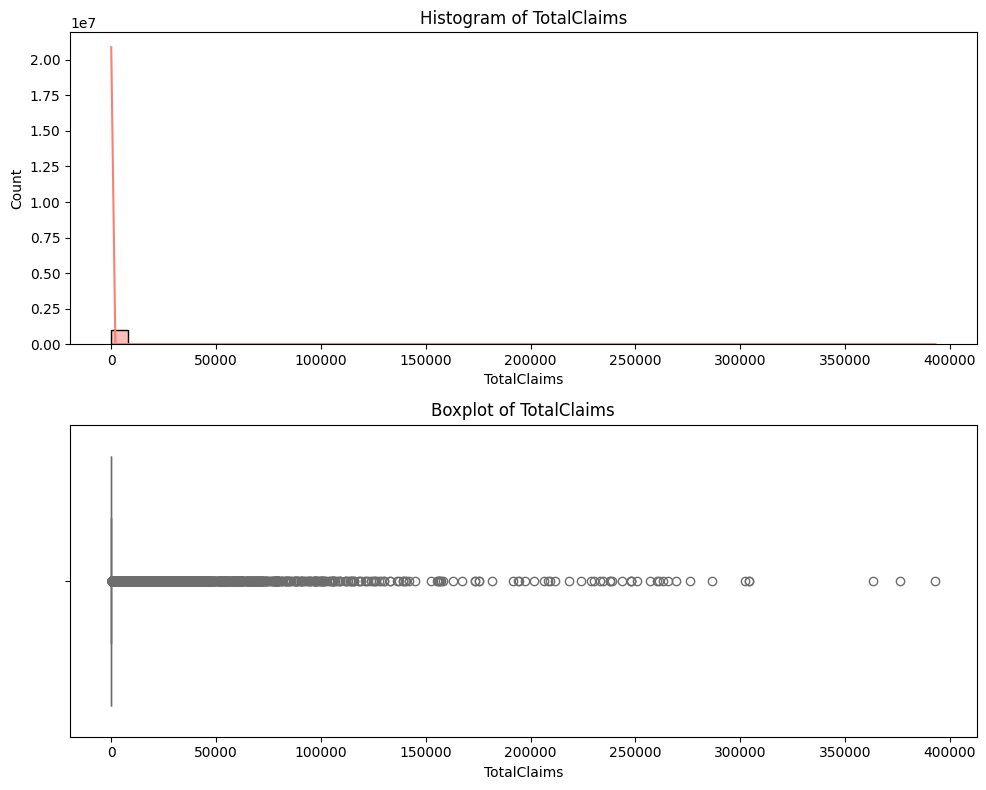

In [6]:
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

sns.histplot(df['TotalClaims'], bins=50, ax=axes[0], kde=True, color='salmon')
axes[0].set_title('Histogram of TotalClaims')

sns.boxplot(x=df['TotalClaims'], ax=axes[1], color='lightcoral')
axes[1].set_title('Boxplot of TotalClaims')

plt.tight_layout()
plt.show()


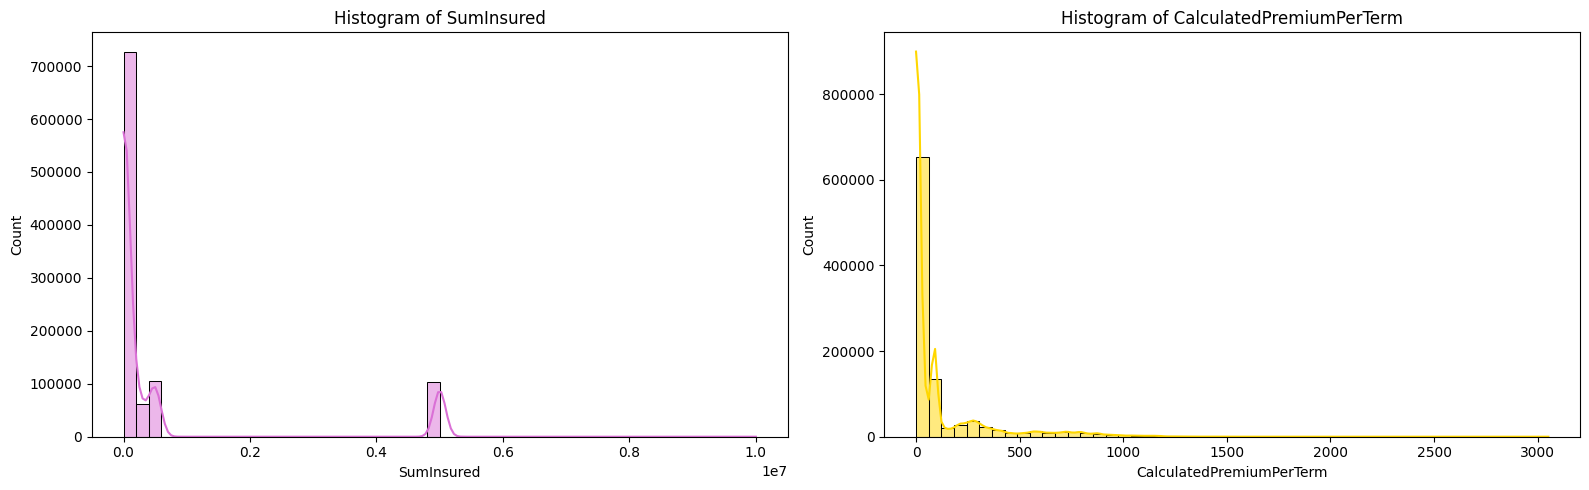

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

sns.histplot(df['SumInsured'], bins=50, ax=axes[0], kde=True, color='orchid')
axes[0].set_title('Histogram of SumInsured')

sns.histplot(df['CalculatedPremiumPerTerm'], bins=50, ax=axes[1], kde=True, color='gold')
axes[1].set_title('Histogram of CalculatedPremiumPerTerm')

plt.tight_layout()
plt.show()


## Univariate Analysis (Single Variable)

### Categorical Variables:

- Bar plot of **Gender**
- Bar plot of **MaritalStatus**
- Bar plot of **Bank**
- Bar plot of **VehicleType**
- Bar plot of **Province**
- Bar plot of **NewVehicle**


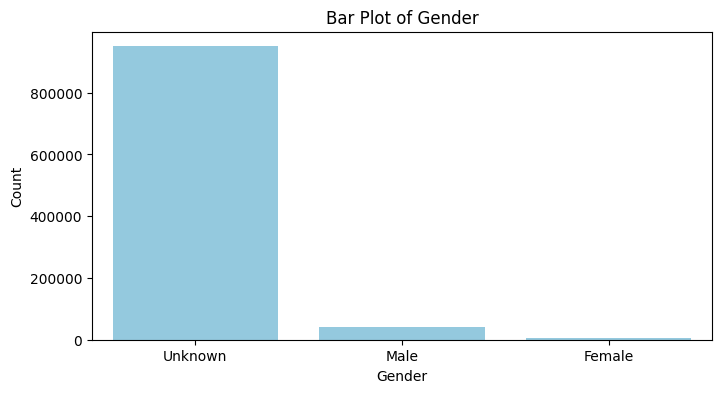

In [9]:
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='Gender', color='skyblue')
plt.title('Bar Plot of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


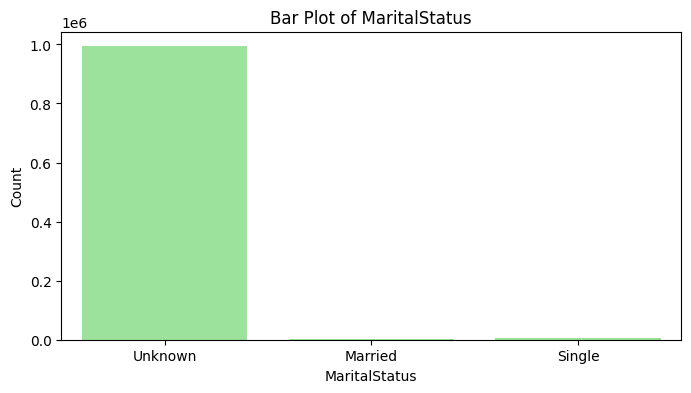

In [10]:
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='MaritalStatus', color='lightgreen')
plt.title('Bar Plot of MaritalStatus')
plt.xlabel('MaritalStatus')
plt.ylabel('Count')
plt.show()


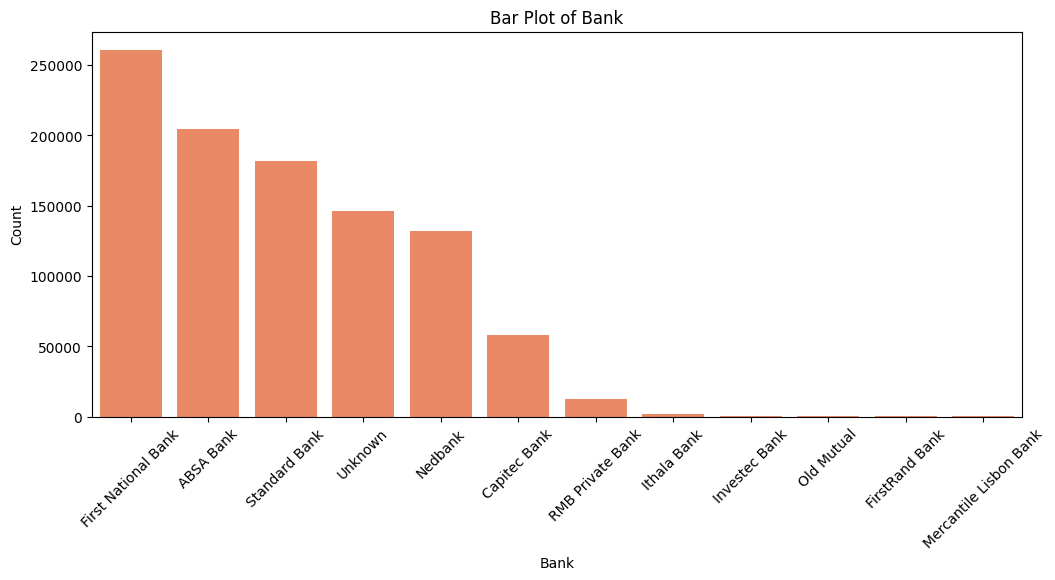

In [11]:
plt.figure(figsize=(12,5))
sns.countplot(data=df, x='Bank', order=df['Bank'].value_counts().index, color='coral')
plt.title('Bar Plot of Bank')
plt.xlabel('Bank')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


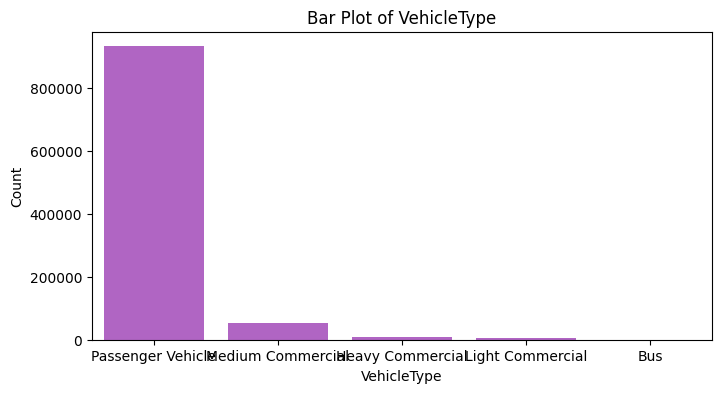

In [12]:
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='VehicleType', color='mediumorchid')
plt.title('Bar Plot of VehicleType')
plt.xlabel('VehicleType')
plt.ylabel('Count')
plt.show()


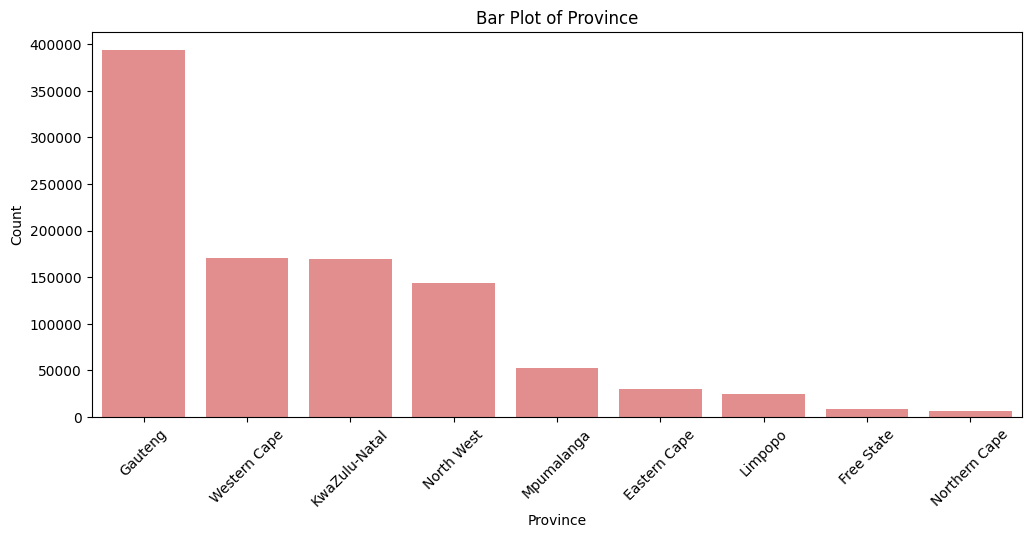

In [13]:
plt.figure(figsize=(12,5))
sns.countplot(data=df, x='Province', order=df['Province'].value_counts().index, color='lightcoral')
plt.title('Bar Plot of Province')
plt.xlabel('Province')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


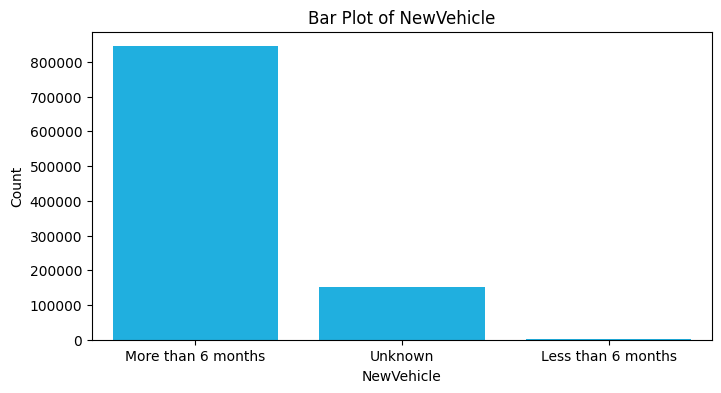

In [14]:
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='NewVehicle', color='deepskyblue')
plt.title('Bar Plot of NewVehicle')
plt.xlabel('NewVehicle')
plt.ylabel('Count')
plt.show()


## Bivariate Analysis (Two Variables)

### Categorical vs Numeric:

- Boxplot: **TotalPremium** by **Gender**
- Boxplot: **TotalPremium** by **VehicleType**
- Boxplot: **TotalPremium** by **Province**
- Boxplot: **TotalPremium** by **NewVehicle**


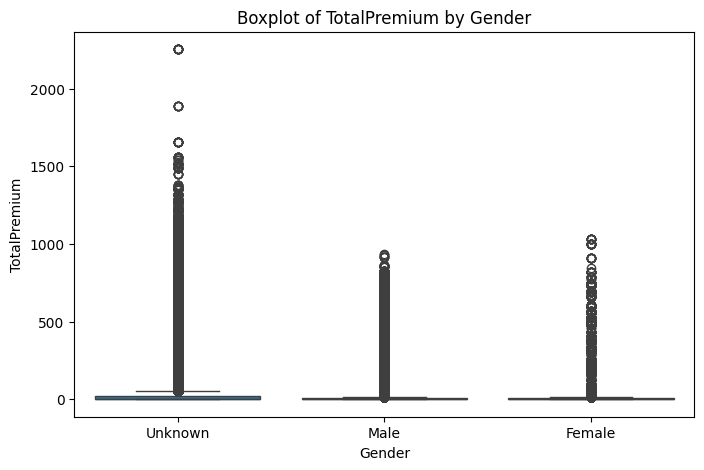

In [16]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='Gender', y='TotalPremium')
plt.title('Boxplot of TotalPremium by Gender')
plt.xlabel('Gender')
plt.ylabel('TotalPremium')
plt.show()


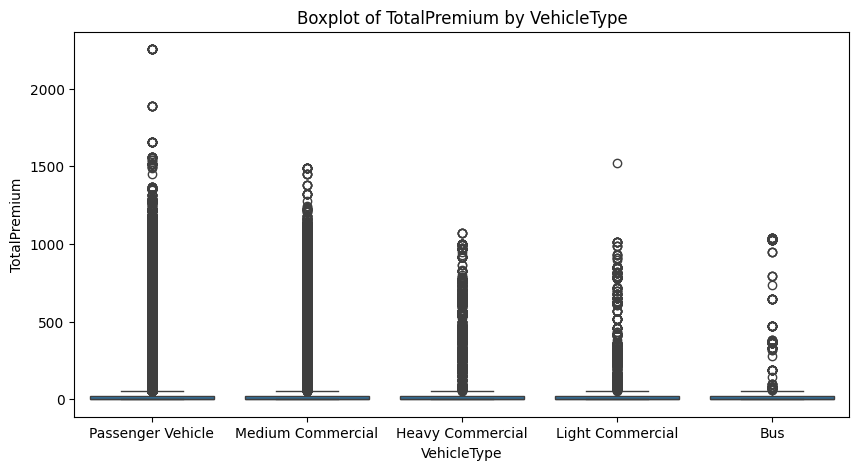

In [17]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='VehicleType', y='TotalPremium')
plt.title('Boxplot of TotalPremium by VehicleType')
plt.xlabel('VehicleType')
plt.ylabel('TotalPremium')
plt.show()


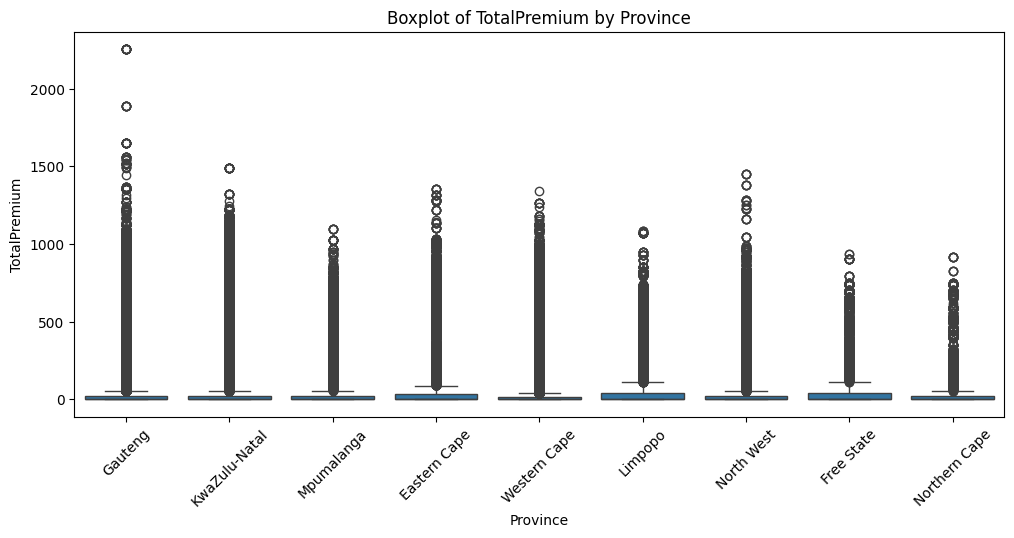

In [18]:
plt.figure(figsize=(12,5))
sns.boxplot(data=df, x='Province', y='TotalPremium')
plt.title('Boxplot of TotalPremium by Province')
plt.xlabel('Province')
plt.ylabel('TotalPremium')
plt.xticks(rotation=45)
plt.show()


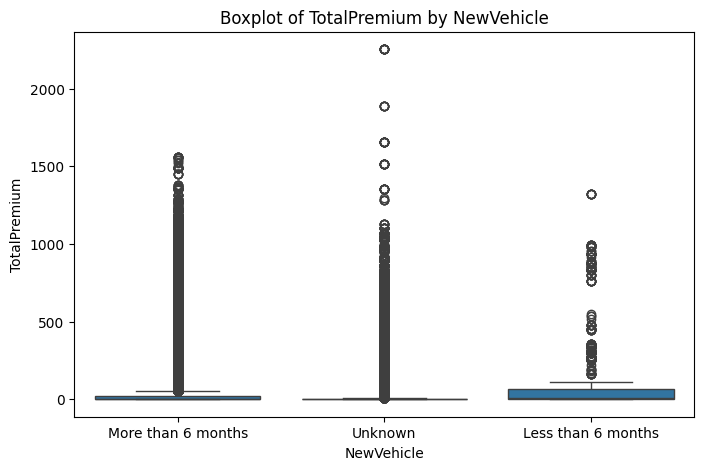

In [19]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='NewVehicle', y='TotalPremium')
plt.title('Boxplot of TotalPremium by NewVehicle')
plt.xlabel('NewVehicle')
plt.ylabel('TotalPremium')
plt.show()


## Numeric vs Numeric
Objective: Explore relationships between numeric variables through scatter plots and correlation heatmap.

- Scatter plot: SumInsured vs TotalPremium

- Scatter plot: CalculatedPremiumPerTerm vs TotalPremium

- Correlation heatmap (numeric variables)

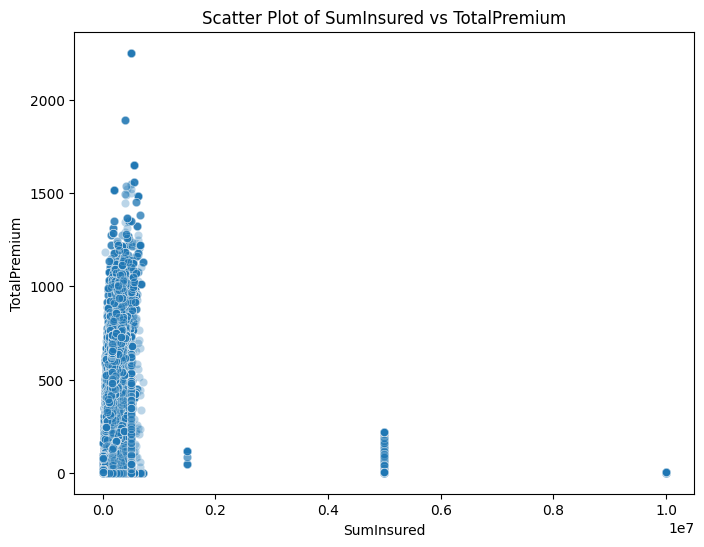

In [20]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='SumInsured', y='TotalPremium', alpha=0.3)
plt.title('Scatter Plot of SumInsured vs TotalPremium')
plt.xlabel('SumInsured')
plt.ylabel('TotalPremium')
plt.show()


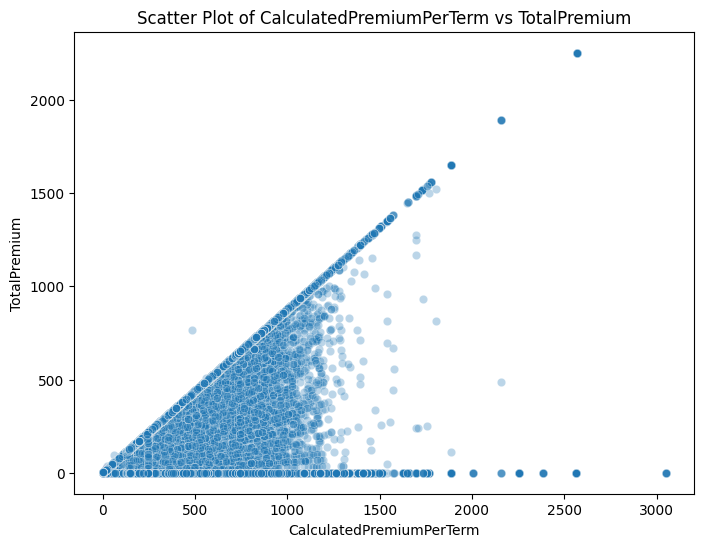

In [21]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='CalculatedPremiumPerTerm', y='TotalPremium', alpha=0.3)
plt.title('Scatter Plot of CalculatedPremiumPerTerm vs TotalPremium')
plt.xlabel('CalculatedPremiumPerTerm')
plt.ylabel('TotalPremium')
plt.show()


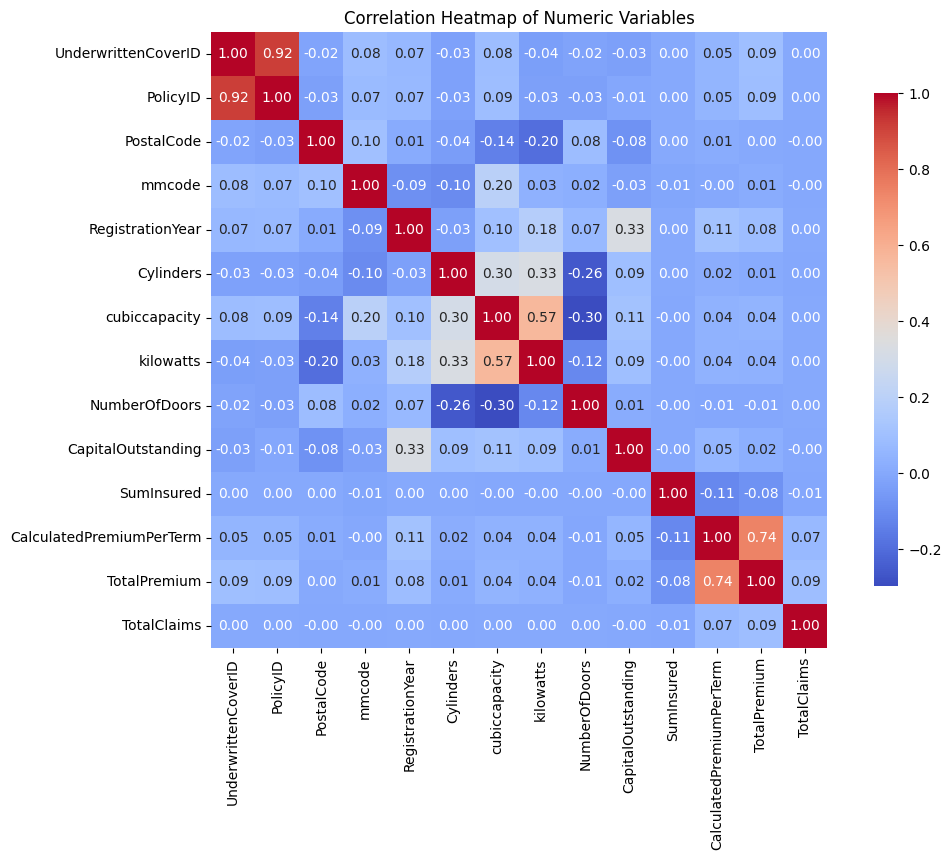

In [22]:
plt.figure(figsize=(12,8))
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
corr = df[numeric_cols].corr()

sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={'shrink':0.8})
plt.title('Correlation Heatmap of Numeric Variables')
plt.show()


## Time Series Analysis

**Objective:**  
Explore trends over time by visualizing the monthly totals of `TotalPremium` and `TotalClaims`. This will help identify any seasonal patterns or shifts in the data across different months.

The plots below display:
- Monthly aggregated `TotalPremium`
- Monthly aggregated `TotalClaims`


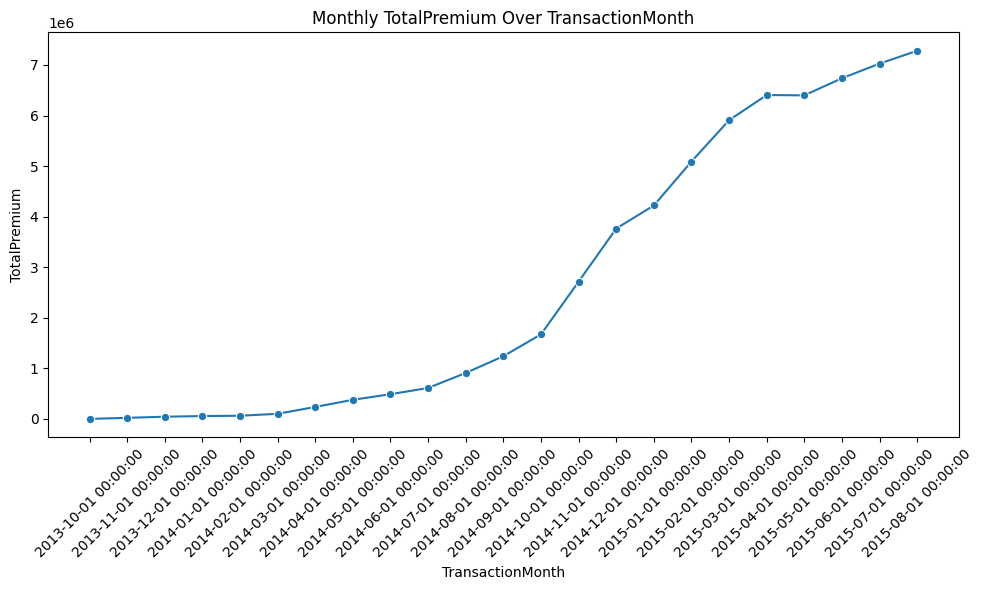

In [23]:
monthly_premium = df.groupby('TransactionMonth')['TotalPremium'].sum().reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(data=monthly_premium, x='TransactionMonth', y='TotalPremium', marker='o')
plt.title('Monthly TotalPremium Over TransactionMonth')
plt.xlabel('TransactionMonth')
plt.ylabel('TotalPremium')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


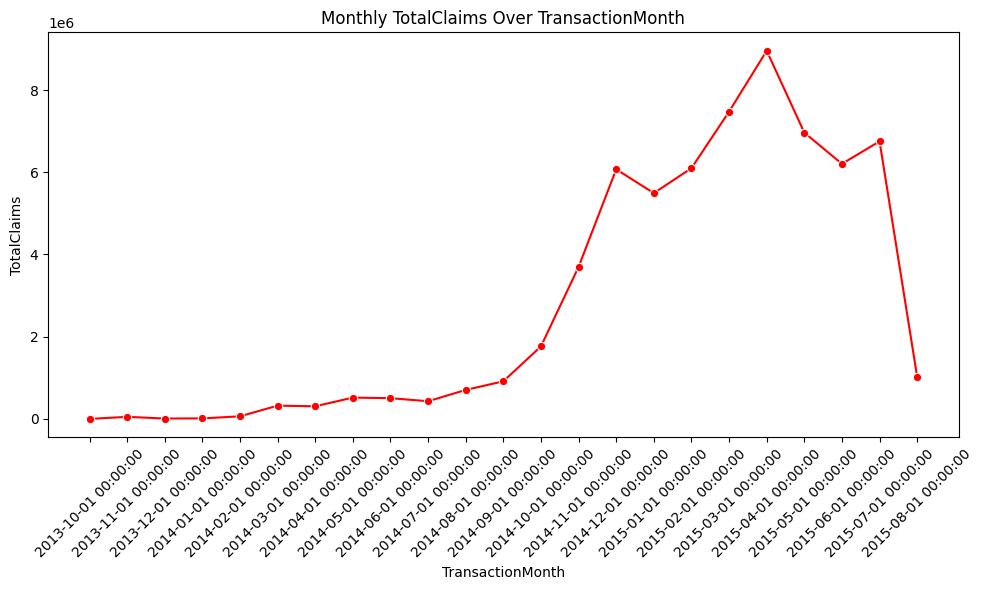

In [24]:
monthly_claims = df.groupby('TransactionMonth')['TotalClaims'].sum().reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(data=monthly_claims, x='TransactionMonth', y='TotalClaims', marker='o', color='red')
plt.title('Monthly TotalClaims Over TransactionMonth')
plt.xlabel('TransactionMonth')
plt.ylabel('TotalClaims')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Multivariate Insights (If Time Allows)

**Objective:**  
Explore deeper insights by analyzing the interaction between multiple variables.

- Boxplot of `TotalPremium` segmented by `Gender` and `NewVehicle` status  
- Heatmap showing counts of combinations between `Province` and `VehicleType`  
- Stacked bar chart displaying the distribution of `CoverType` across different `Product` categories


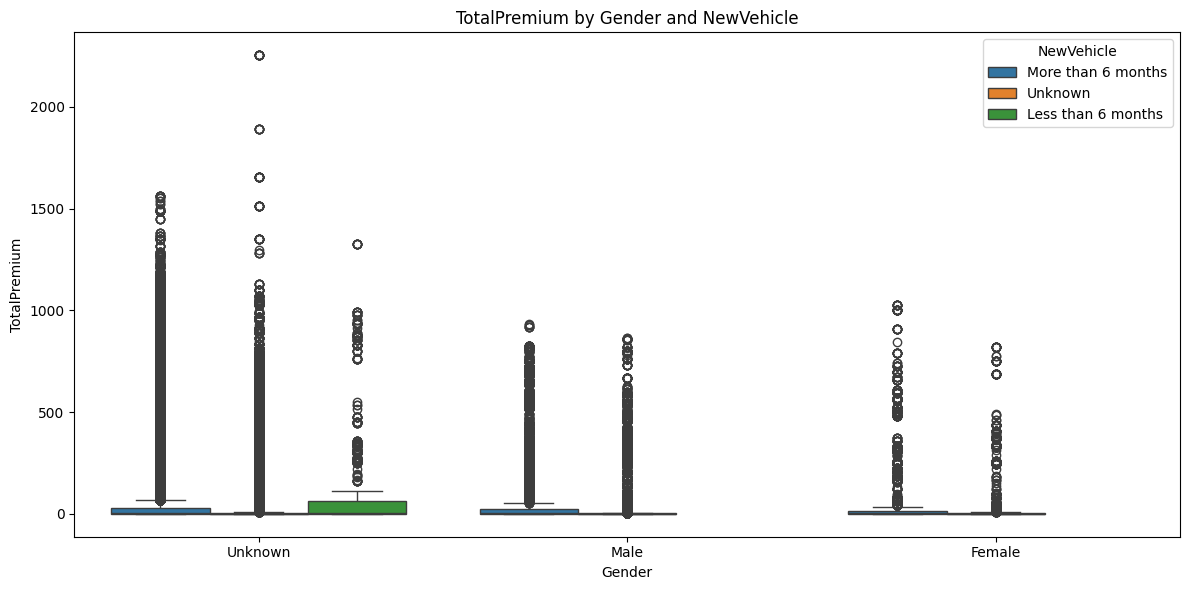

In [25]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='Gender', y='TotalPremium', hue='NewVehicle')
plt.title('TotalPremium by Gender and NewVehicle')
plt.xlabel('Gender')
plt.ylabel('TotalPremium')
plt.legend(title='NewVehicle')
plt.tight_layout()
plt.show()

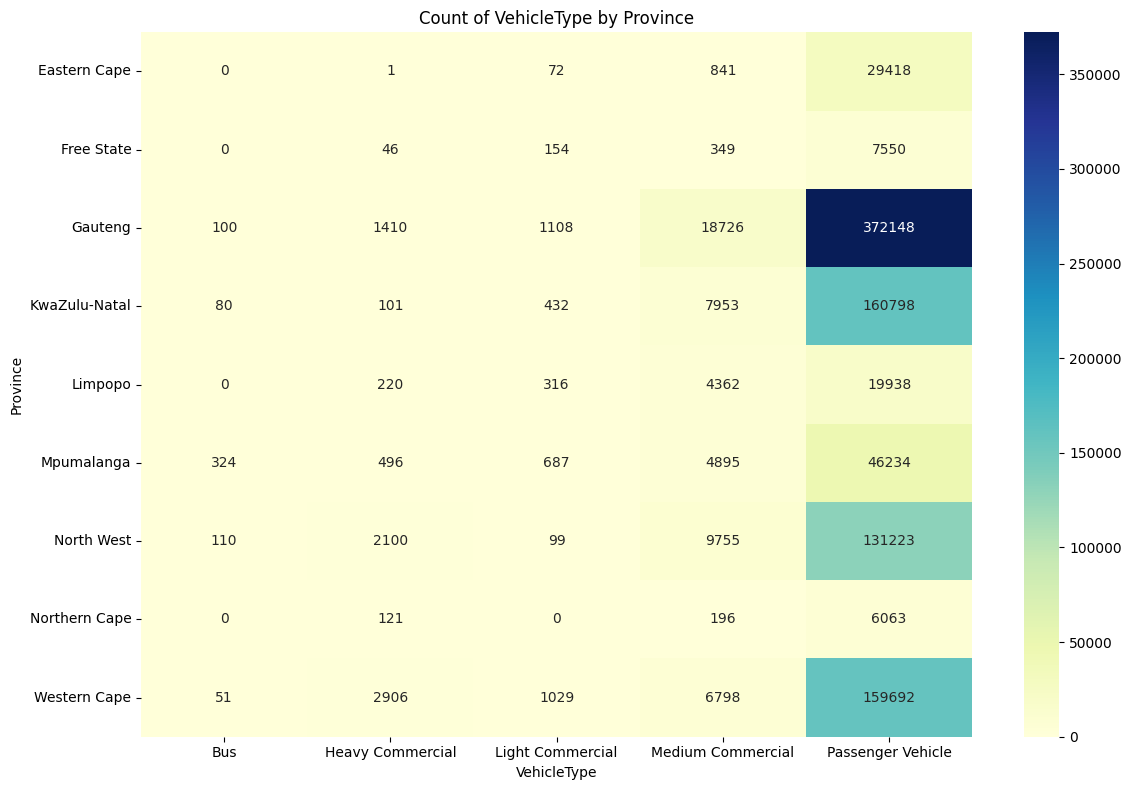

In [26]:
prov_vehicle_counts = pd.crosstab(df['Province'], df['VehicleType'])

plt.figure(figsize=(12,8))
sns.heatmap(prov_vehicle_counts, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Count of VehicleType by Province')
plt.xlabel('VehicleType')
plt.ylabel('Province')
plt.tight_layout()
plt.show()

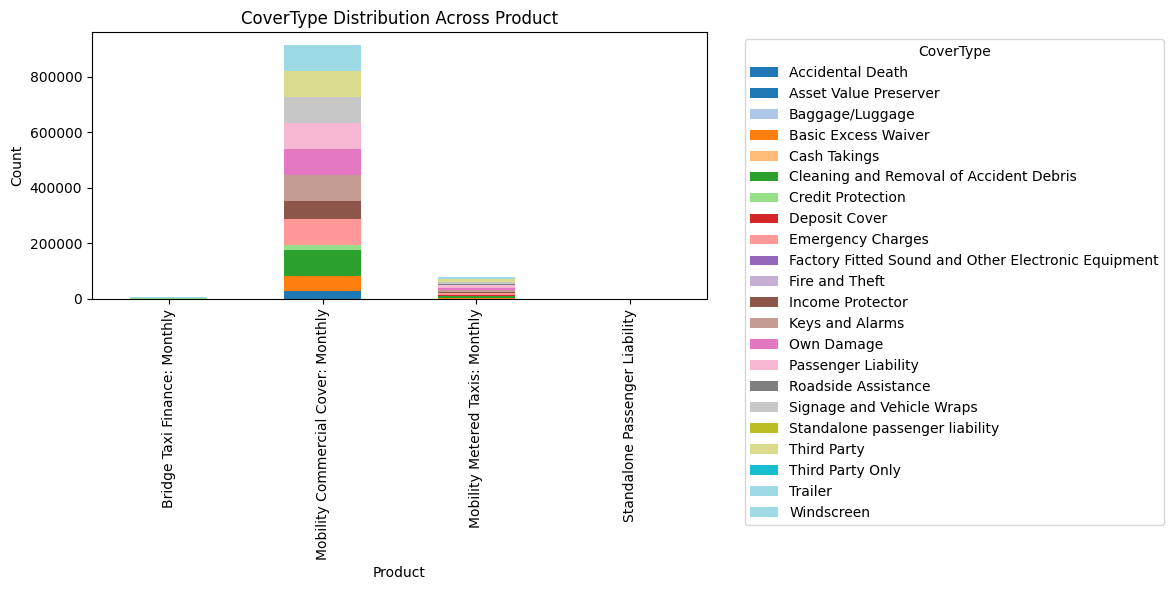

In [27]:
cover_product_counts = pd.crosstab(df['Product'], df['CoverType'])
cover_product_counts.plot(kind='bar', stacked=True, figsize=(12,6), colormap='tab20')

plt.title('CoverType Distribution Across Product')
plt.xlabel('Product')
plt.ylabel('Count')
plt.legend(title='CoverType', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Target Variable Distribution and Transformation
- Look closely at your target or important numeric variables (e.g., TotalPremium).
- Plot skewness and consider transformations (log, sqrt) if highly skewed.

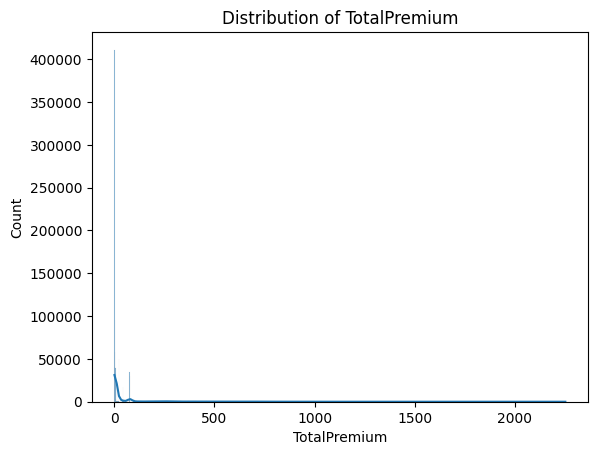

Skewness: 3.55


In [30]:
sns.histplot(df['TotalPremium'], kde=True)
plt.title('Distribution of TotalPremium')
plt.show()

print(f"Skewness: {df['TotalPremium'].skew():.2f}")


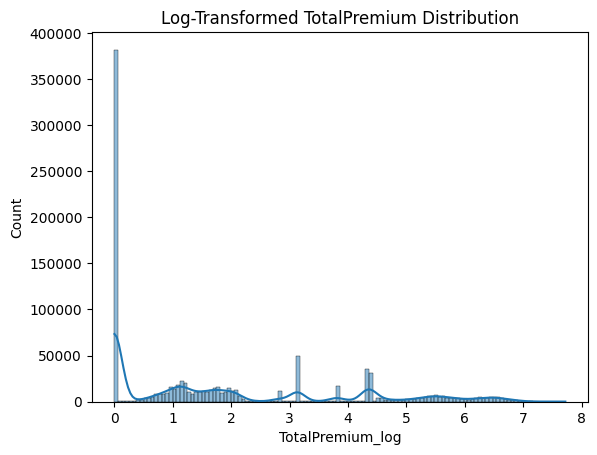

In [31]:
df['TotalPremium_log'] = np.log1p(df['TotalPremium'])
sns.histplot(df['TotalPremium_log'], kde=True)
plt.title('Log-Transformed TotalPremium Distribution')
plt.show()